In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Parte 1

## 1.1 Coordenadas cromaticas

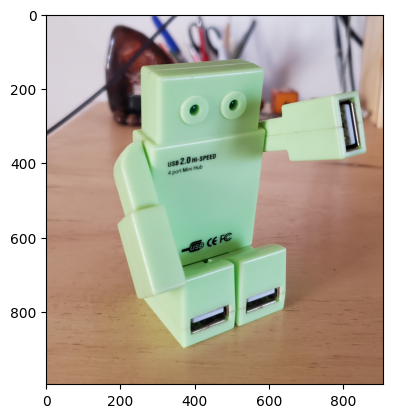

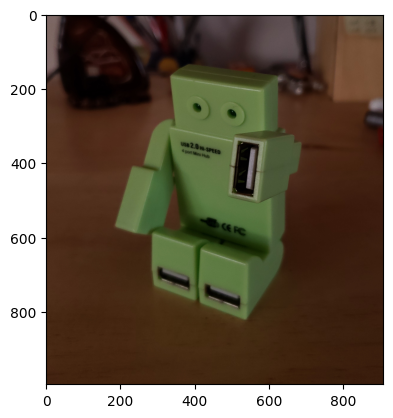

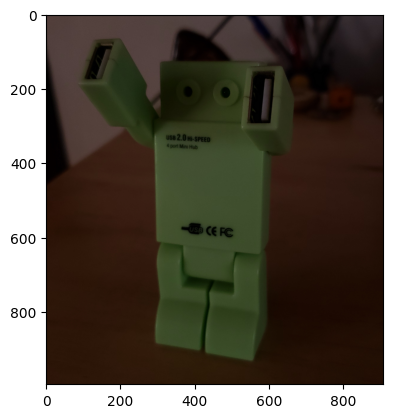

In [16]:
img_orig1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img_orig1 = cv.cvtColor(img_orig1, cv.COLOR_BGR2RGB)
img_orig2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img_orig2 = cv.cvtColor(img_orig2, cv.COLOR_BGR2RGB)
img_orig3 = cv.imread('coord_cromaticas/CoordCrom_3.png')
img_orig3 = cv.cvtColor(img_orig3, cv.COLOR_BGR2RGB)

plt.imshow(img_orig1)
plt.show()
plt.imshow(img_orig2)
plt.show()
plt.imshow(img_orig3)
plt.show()

In [17]:
def chromatic(img):
    r, g, b = cv.split(img)
    rgb = r.astype(np.uint16) + g.astype(np.uint16) + b.astype(np.uint16)
    try:
        img_chrom = cv.merge((r/rgb,  g/rgb, b/rgb))
    except:
        print("div 0")
    return cv.normalize(img_chrom, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

In [18]:
img_1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

img_2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

img_3 = cv.imread('coord_cromaticas/CoordCrom_3.png')
img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)

img_cromatica_1 = chromatic(img_1)
img_cromatica_2 = chromatic(img_2)
img_cromatica_3 = chromatic(img_3)

C:\Users\azuly\AppData\Local\Temp\ipykernel_11756\2421675089.py:5: RuntimeWarning: invalid value encountered in divide
  img_chrom = cv.merge((r/rgb,  g/rgb, b/rgb))


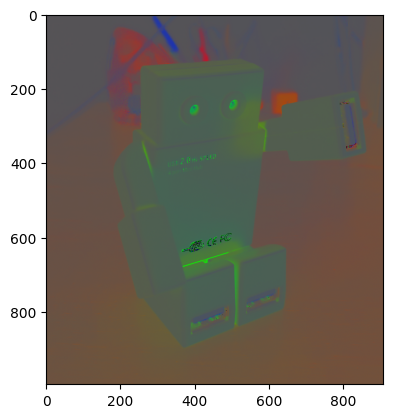

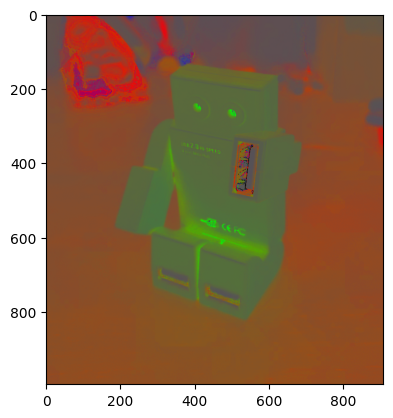

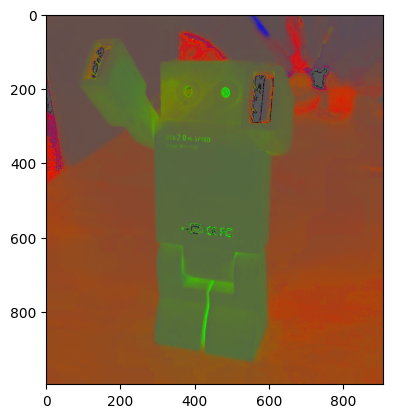

In [19]:
plt.imshow(img_cromatica_1)
plt.show()
plt.imshow(img_cromatica_2)
plt.show()
plt.imshow(img_cromatica_3)
plt.show()

## 1.2 White-Patch

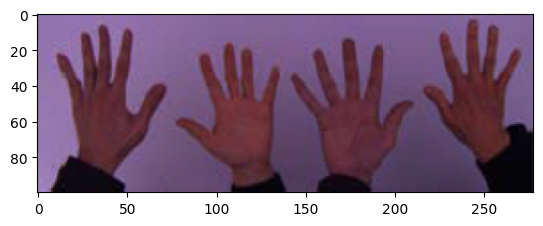

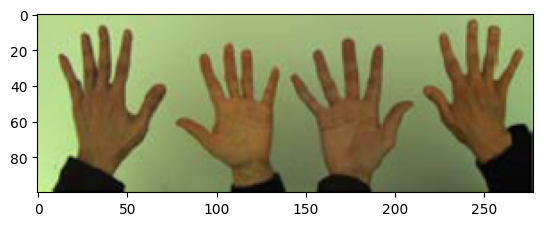

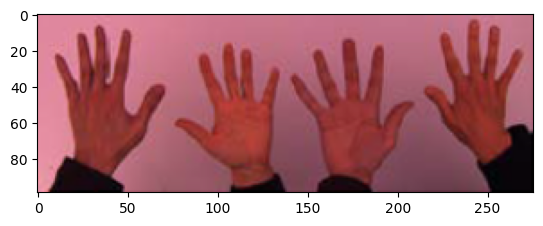

In [31]:
test_blue = cv.imread('white_patch/test_blue.png')
test_blue = cv.cvtColor(test_blue, cv.COLOR_BGR2RGB)
test_green = cv.imread('white_patch/test_green.png')
test_green = cv.cvtColor(test_green, cv.COLOR_BGR2RGB)
test_red = cv.imread('white_patch/test_red.png')
test_red = cv.cvtColor(test_red, cv.COLOR_BGR2RGB)

plt.imshow(test_blue)
plt.show()
plt.imshow(test_green)
plt.show()
plt.imshow(test_red)
plt.show()

In [32]:
def white_patch(img, percentil=100):
    r_max = np.percentile(img[:,:,0], percentil)
    g_max = np.percentile(img[:,:,1], percentil)
    b_max = np.percentile(img[:,:,2], percentil)

    r, g, b = cv.split(img)
    return cv.merge((np.uint8(r.astype(np.uint16) * 255 / r_max), np.uint8(g.astype(np.uint16) * 255 / g_max), np.uint8(b.astype(np.uint16) * 255 / b_max)))

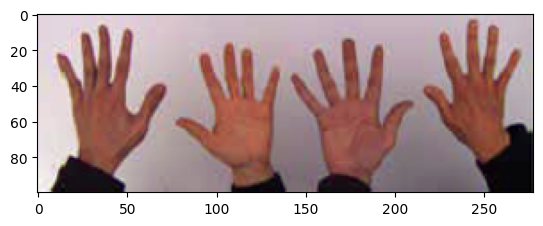

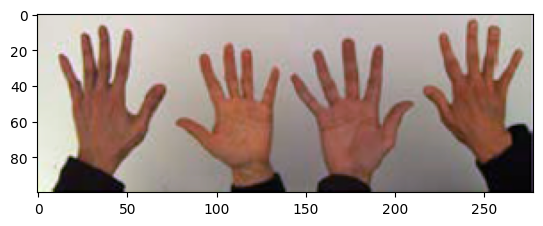

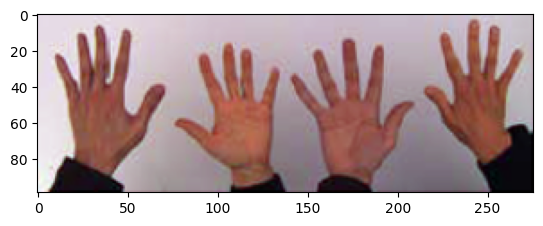

In [33]:
test_blue_wp = white_patch(test_blue)
test_green_wp = white_patch(test_green)
test_red_wp = white_patch(test_red)

plt.imshow(test_blue_wp)
plt.show()
plt.imshow(test_green_wp)
plt.show()
plt.imshow(test_red_wp)
plt.show()

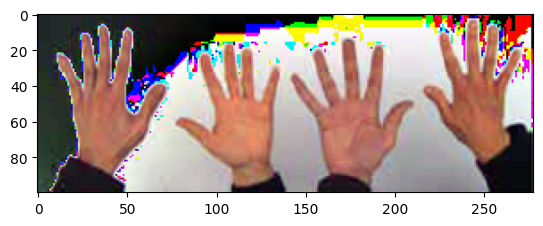

In [34]:
test_blue_wp = white_patch(test_blue,80)

plt.imshow(test_blue_wp)
plt.show()


Para solucionar el problema de la división por cero se puede usar un percentil de los valores de la imagen, pero mientras mas alejado este este de 100 mas artefactos indeseados se producen

# 2 Histograma

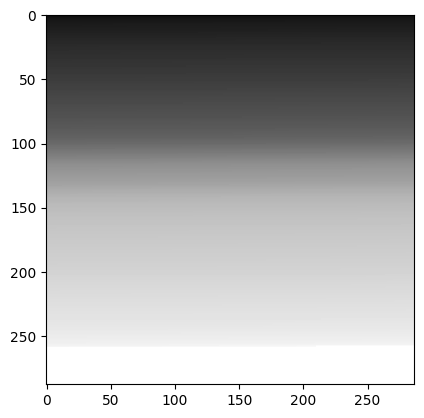

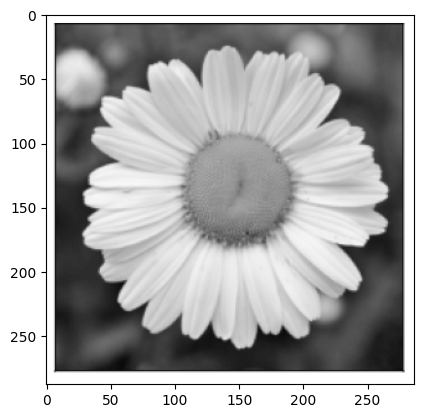

In [35]:
img_bw_1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img_bw_2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img_bw_1, cmap='gray')
plt.show()
plt.imshow(img_bw_2, cmap='gray')
plt.show()

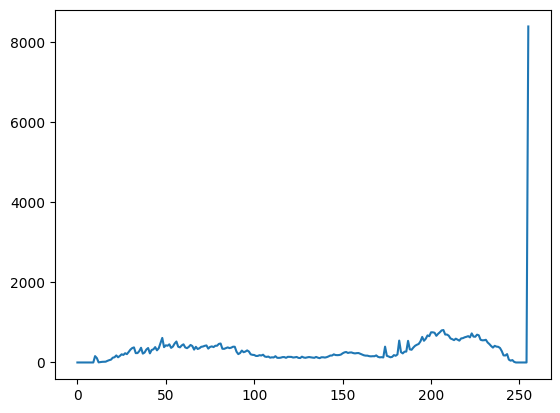

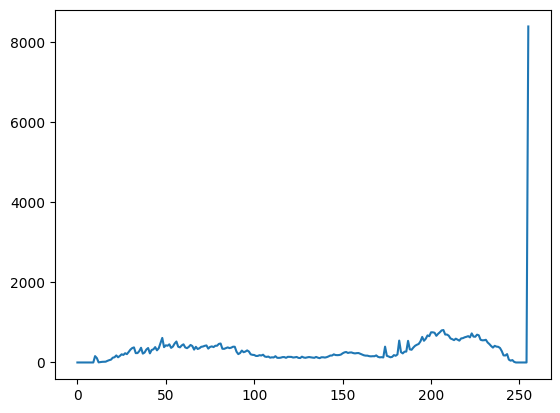

In [4]:
hist1, bins1 = np.histogram(img_bw_1.ravel(), 256, [0, 256])
hist2, bins2 = np.histogram(img_bw_2.ravel(), 256, [0, 256])
plt.plot(hist1)
plt.show()
plt.plot(hist2)
plt.show()

Si bien las imágenes son diferentes los histogrmas son iguales ya que estos dependen de la cantidad de puntos de cada color y no de su ubicación en la imágen. Los histogramas no deberían ser el único feature a ser utilizado a la hora clasificación/detección de imágenes pero pueden ser útiles en conjunto con otros features.

# 3 Segmentación

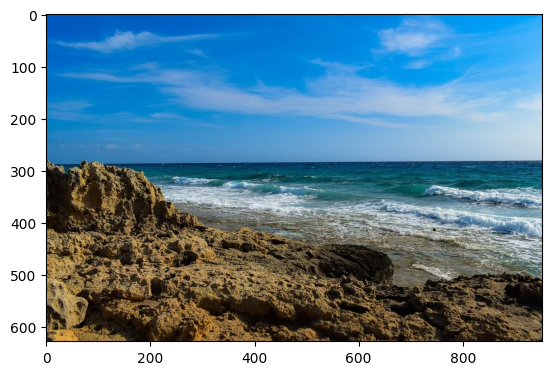

In [3]:
img_seg = cv.imread('segmentacion.png')
imgRGB = cv.cvtColor(img_seg, cv.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.show()

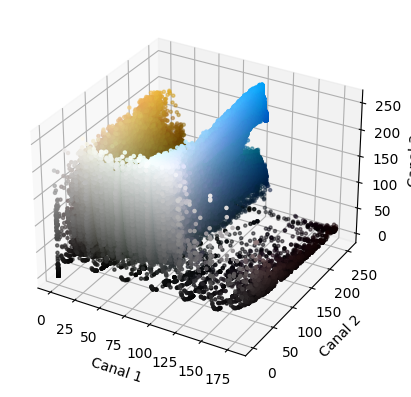

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_HSV = cv.cvtColor(img_seg, cv.COLOR_BGR2HSV)

c1, c2, c3 = cv.split(imgRGB)
c1, c2, c3 = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# Pasamos la imagen a HSV 

img_HSV = cv.cvtColor(img_seg, cv.COLOR_BGR2HSV)

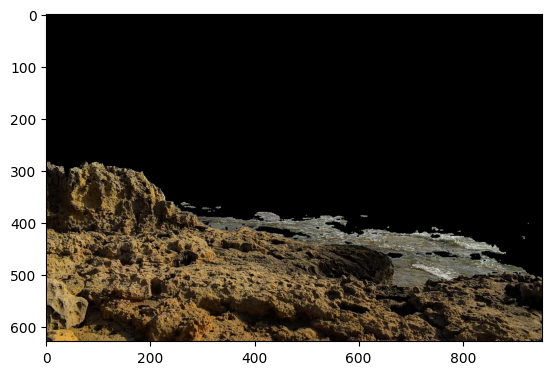

In [11]:
#Mascara para tierra
color_l = (0,0,0)
color_u = (50,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure()
plt.imshow(img_segmentada)
plt.show()

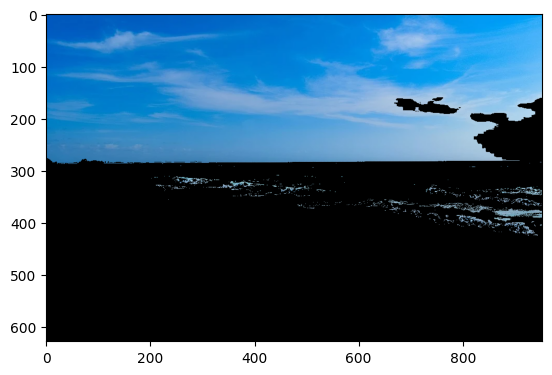

In [12]:
#Mascara para cielo
color_l = (90,60,170)
color_u = (110,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure()
plt.imshow(img_segmentada)
plt.show()


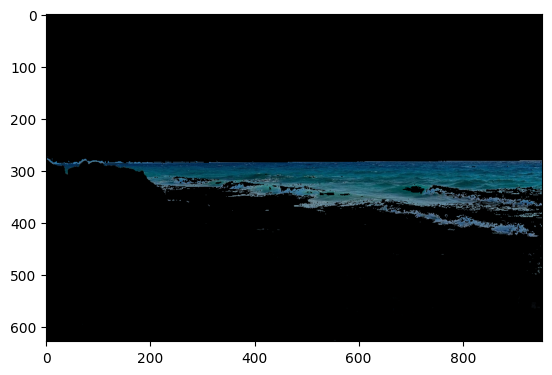

In [13]:
#Mascara para agua
color_l = (90,60,0)
color_u = (110,255,170)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure()
plt.imshow(img_segmentada)
plt.show()